In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

path = r'C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\csvs\beatsdataset0402_full.csv'
d = pd.read_csv(path)
print(d.columns)

Index(['Unnamed: 0', '1-ZCRm', '2-Energym', '3-EnergyEntropym',
       '4-SpectralCentroidm', '5-SpectralSpreadm', '6-SpectralEntropym',
       '7-SpectralFluxm', '8-SpectralRolloffm', '9-MFCCs1m', '10-MFCCs2m',
       '11-MFCCs3m', '12-MFCCs4m', '13-MFCCs5m', '14-MFCCs6m', '15-MFCCs7m',
       '16-MFCCs8m', '17-MFCCs9m', '18-MFCCs10m', '19-MFCCs11m', '20-MFCCs12m',
       '21-MFCCs13m', '22-ChromaVector1m', '23-ChromaVector2m',
       '24-ChromaVector3m', '25-ChromaVector4m', '26-ChromaVector5m',
       '27-ChromaVector6m', '28-ChromaVector7m', '29-ChromaVector8m',
       '30-ChromaVector9m', '31-ChromaVector10m', '32-ChromaVector11m',
       '33-ChromaVector12m', '34-ChromaDeviationm', '35-ZCRstd',
       '36-Energystd', '37-EnergyEntropystd', '38-SpectralCentroidstd',
       '39-SpectralSpreadstd', '40-SpectralEntropystd', '41-SpectralFluxstd',
       '42-SpectralRolloffstd', '43-MFCCs1std', '44-MFCCs2std', '45-MFCCs3std',
       '46-MFCCs4std', '47-MFCCs5std', '48-MFCCs6std', '49-M

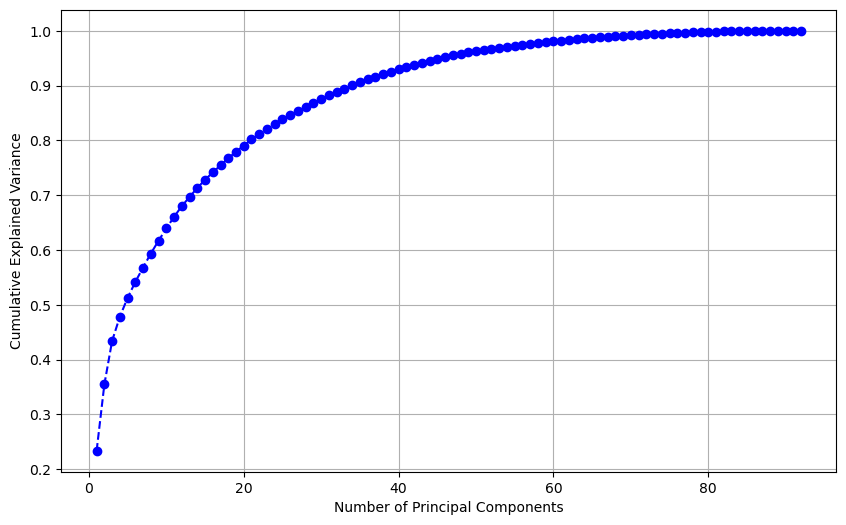

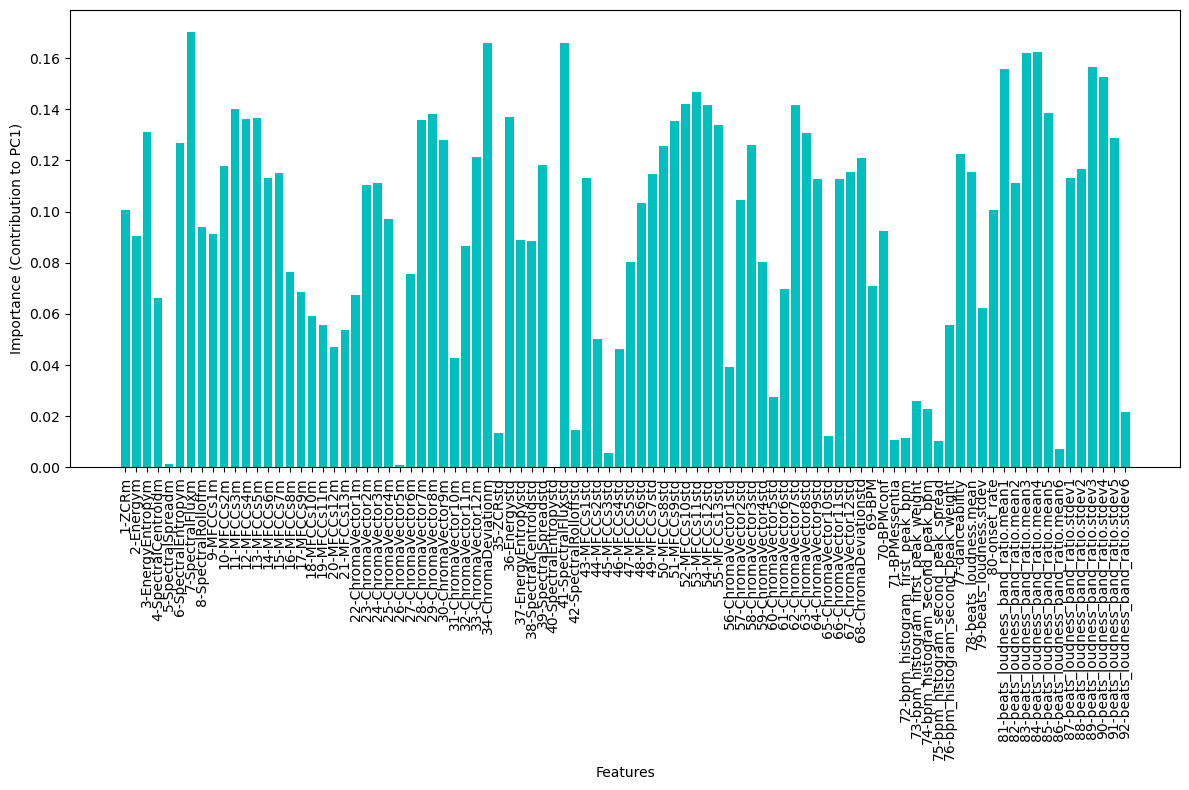

In [11]:
filePath = r'C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\csvs\beatsdataset0402_full.csv'
data = pd.read_csv(filePath)

# Drop 'Unnamed: 0' and 'class' columns
features = data.drop(columns=['Unnamed: 0', 'class'])
scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(features)

#pca
pca = PCA()
pcaFeatures = pca.fit_transform(scaledFeatures)
expVariance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(expVariance) + 1), expVariance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


pcaFeatureImp = np.abs(pca.components_[0])
plt.figure(figsize=(12, 8))
plt.bar(x=features.columns, height=pcaFeatureImp, color='c')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance (Contribution to PC1)')
plt.tight_layout()
plt.show()

# # Optionally, save the PCA-transformed data
# pca_data = pd.DataFrame(pcaFeatures)
# pca_data.to_excel(r'C:\path\to\save\pca_transformed_data.xlsx', index=False) 


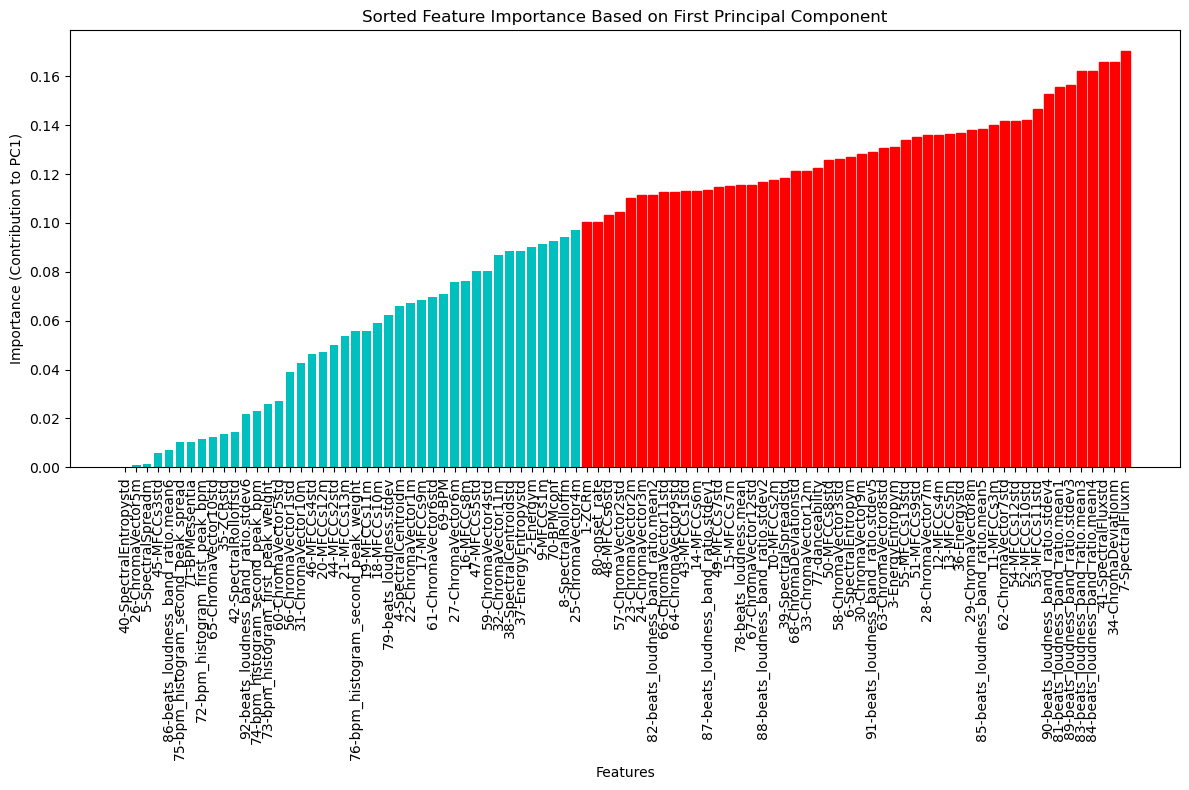

In [14]:
sortedIndices = np.argsort(pcaFeatureImp)
sortedFeatures = features.columns[sortedIndices]
sortedImp = pcaFeatureImp[sortedIndices]
highlightThreshold = 0.10
highlightedFeatures = sortedImp > highlightThreshold

'''
Plotting the highlighted features in red which are more than 0.8 

'''
plt.figure(figsize=(12, 8))
bars = plt.bar(x=sortedFeatures, height=sortedImp, color=['c' if not h else 'r' for h in highlightedFeatures])
plt.title('Sorted Feature Importance Based on First Principal Component')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance (Contribution to PC1)')
plt.tight_layout()


for i, bar in enumerate(bars):
    if sortedImp[i] > highlightThreshold:
        bar.set_color('r')

#  
plt.show()
